In [1]:
# necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# data
s2019_2020 = pd.read_csv('data/2019-2020.csv')

plt.style.use('seaborn-dark')

In [2]:
columns = ['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HTHG', 
           'HTAG', 'HS', 'AS', 'HST', 'AST', 'HC', 'AC']
s2019_2020 = s2019_2020[columns]
s2019_2020.head()

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HC,AC
0,Liverpool,Norwich,4,1,H,4,0,15,12,7,5,11,2
1,West Ham,Man City,0,5,A,0,1,5,14,3,9,1,1
2,Bournemouth,Sheffield United,1,1,D,0,0,13,8,3,3,3,4
3,Burnley,Southampton,3,0,H,0,0,10,11,4,3,2,7
4,Crystal Palace,Everton,0,0,D,0,0,6,10,2,3,6,2


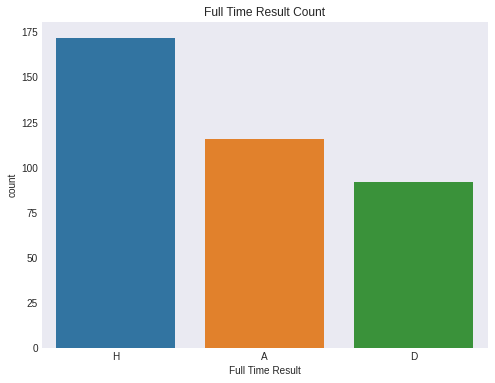

In [3]:
fig, ax = plt.subplots(figsize=(8, 6))
sns.countplot(x=s2019_2020.FTR)
plt.title('Full Time Result Count')
plt.xlabel('Full Time Result')
plt.setp(['Home', 'Away', 'Draw'])
fig.savefig('plots/ftr_count.jpg', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

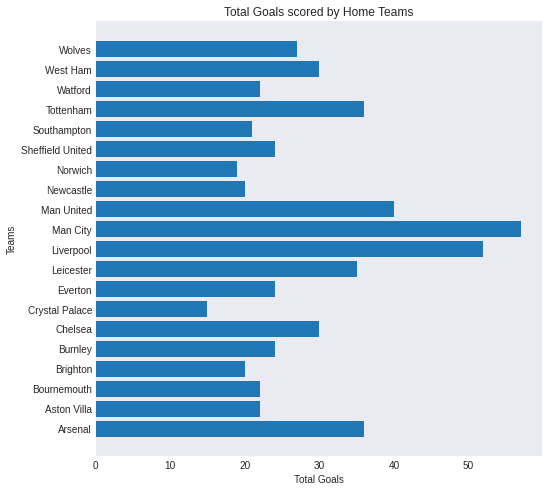

In [4]:
ht = s2019_2020.groupby('HomeTeam')
df = pd.DataFrame(columns=['Team', 'Home Total Goals'])
df['Team'] = ht.groups.keys()
df['Home Total Goals'] = ht.FTHG.sum().values

fig, axes = plt.subplots(figsize=(8, 8))
plt.barh(df['Team'], df['Home Total Goals'])

plt.title('Total Goals scored by Home Teams')
plt.ylabel('Teams')
plt.xlabel('Total Goals')
fig.savefig('plots/home_total_goals.jpg', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

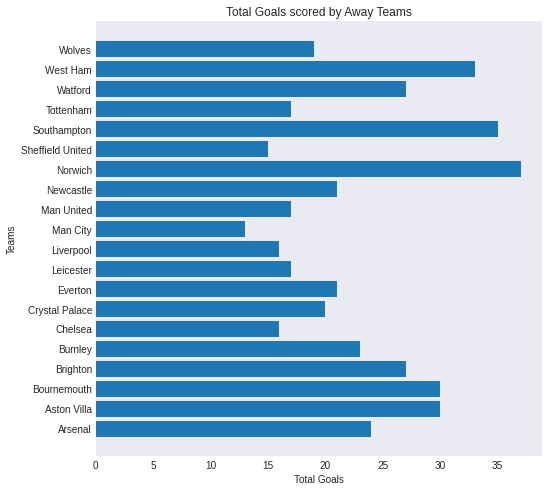

In [5]:
at = s2019_2020.groupby('AwayTeam')
df = pd.DataFrame(columns=['Team', 'Away Total Goals'])
df['Team'] = ht.groups.keys()
df['Away Total Goals'] = ht.FTAG.sum().values

fig, axes = plt.subplots(figsize=(8, 8))
plt.barh(df['Team'], df['Away Total Goals'])
plt.title('Total Goals scored by Away Teams')
plt.ylabel('Teams')
plt.xlabel('Total Goals')
fig.savefig('plots/away_total_goals.jpg', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

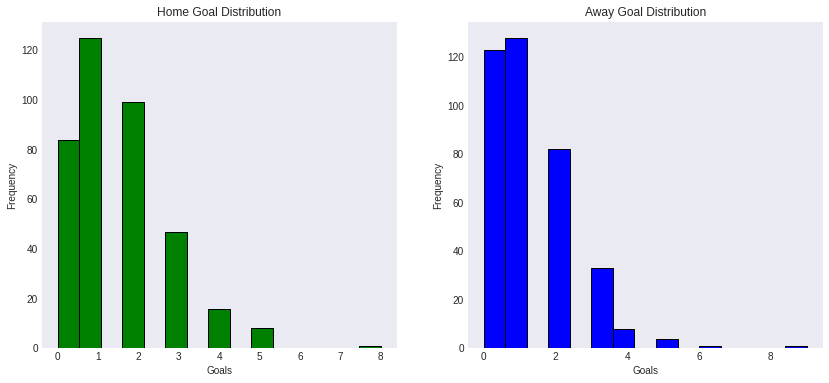

In [6]:
fig, axes = plt.subplots(1,2, figsize=(14, 6))

axes[0].hist(s2019_2020.FTHG, facecolor='green', edgecolor='black', bins=15)
axes[0].set_title('Home Goal Distribution')
axes[0].set_ylabel('Frequency')
axes[0].set_xlabel('Goals')

axes[1].hist(s2019_2020.FTAG, facecolor='blue', edgecolor='black', bins=15)
axes[1].set_title('Away Goal Distribution')
axes[1].set_ylabel('Frequency')
axes[1].set_xlabel('Goals')
fig.savefig('plots/home_dist.jpg', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

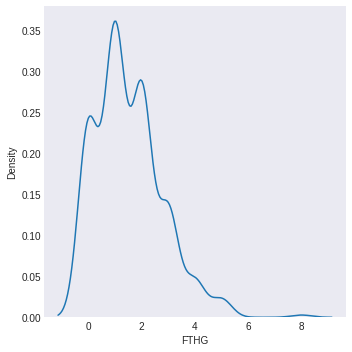

In [7]:
sns.displot(x=s2019_2020.FTHG, kind='kde')
plt.show()

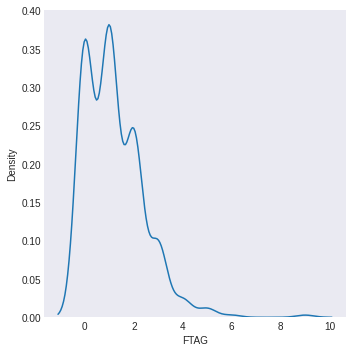

In [8]:
sns.displot(x=s2019_2020.FTAG, kind='kde')
plt.show()

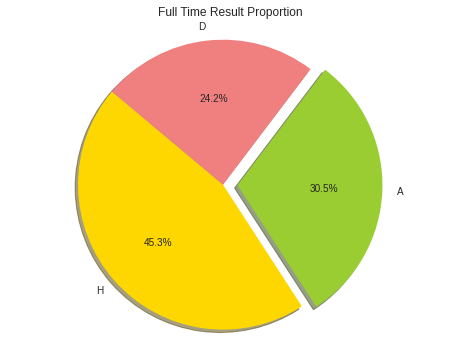

In [9]:
fig, ax = plt.subplots(figsize=(8, 6))
FTR = ['H', 'A', 'D']
count = s2019_2020.FTR.value_counts()
colors = ['gold', 'yellowgreen', 'lightcoral']
explode = (0,0.1, 0)
plt.pie(count, labels=FTR, colors=colors, explode=explode, shadow=True, startangle=140, autopct='%1.1f%%')
plt.axis('equal')
plt.title('Full Time Result Proportion')
fig.savefig('plots/Ftr_percent.jpg', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

In [10]:
def form(data, k=0.33):
    clubs = data.HomeTeam.unique()
    form_dict = {}
    for club in clubs:
        form_dict[club] = [1.0]
        
    for idx, row in data.iterrows():
        ht_current_form = form_dict[row['HomeTeam']][-1]
        at_current_form = form_dict[row['AwayTeam']][-1]

        if row['FTR'] == 'H':
            form_dict[row['HomeTeam']].append(ht_current_form + (k * at_current_form))
            form_dict[row['AwayTeam']].append(at_current_form - (k * at_current_form))
    
        if row['FTR'] == 'A':
            form_dict[row['AwayTeam']].append(at_current_form + (k * ht_current_form))
            form_dict[row['HomeTeam']].append(ht_current_form - (k * ht_current_form))
            
        if row['FTR'] == 'D':
            form_dict[row['HomeTeam']].append(ht_current_form - (k * (ht_current_form - at_current_form)))
            form_dict[row['AwayTeam']].append(at_current_form - (k * (at_current_form - ht_current_form)))
            
    return form_dict

In [11]:
s2019_2020['HF'] = 0.0
s2019_2020['AF'] = 0.0

form_data = form(s2019_2020)

for club in s2019_2020.HomeTeam.unique(): 
    mask = (s2019_2020['HomeTeam'] == club) | (s2019_2020['AwayTeam'] == club)
    k = 0
    
    for idx, row in s2019_2020[mask].iterrows():
        if row['HomeTeam'] == club:
            s2019_2020.loc[idx, 'HF'] = form_data[club][k]
        if row['AwayTeam'] == club:
            s2019_2020.loc[idx, 'AF'] = form_data[club][k]
        k += 1
s2019_2020.tail(12)

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HTHG,HTAG,HS,AS,HST,AST,HC,AC,HF,AF
368,Man United,West Ham,1,1,D,0,1,11,12,4,3,2,3,1.720686,0.646608
369,Liverpool,Chelsea,5,3,H,3,1,10,10,7,5,6,0,1.684317,1.008147
370,Arsenal,Watford,3,2,H,3,1,13,19,5,6,4,8,1.025504,0.256786
371,Burnley,Brighton,1,2,A,1,1,13,14,2,4,6,7,1.618786,0.536031
372,Chelsea,Wolves,2,0,H,2,0,11,5,3,1,3,3,0.675459,1.365018
373,Crystal Palace,Tottenham,1,1,D,0,1,13,7,2,2,7,2,0.100465,1.846227
374,Everton,Bournemouth,1,3,A,1,2,13,13,5,7,2,5,1.126467,0.377260
375,Leicester,Man United,0,2,A,0,0,14,7,3,3,3,3,0.769345,1.366240
376,Man City,Norwich,5,0,H,2,0,31,5,10,4,9,0,2.497470,0.009549
377,Newcastle,Liverpool,1,3,A,1,1,3,14,2,6,2,4,0.368554,2.017005


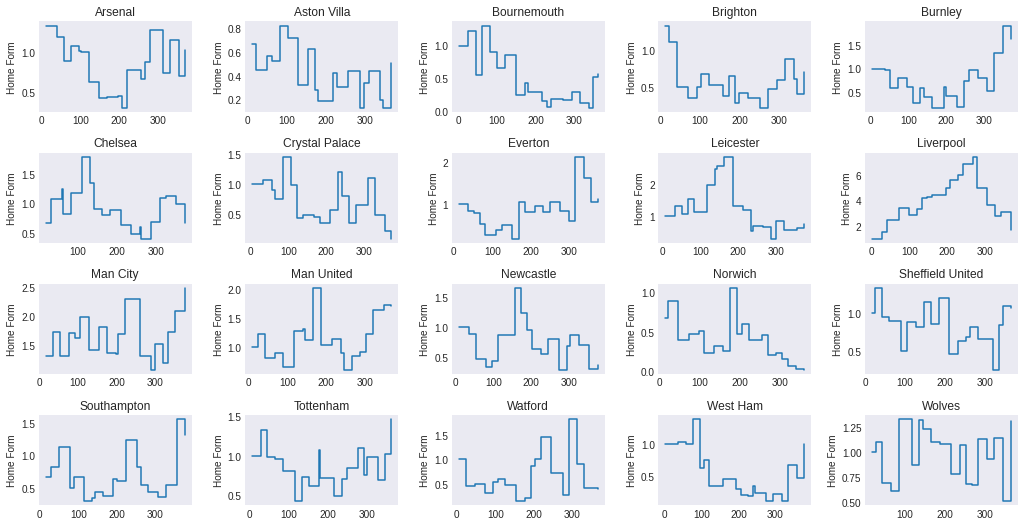

In [12]:
ht = s2019_2020.groupby('HomeTeam')

fig, axes = plt.subplots(4, 5, figsize=(16, 8))

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.35)

clubs = list(ht.groups.keys())
idx = 0
for i in range(4):
    for j in range(5):
        axes[i, j].plot(ht.get_group(clubs[idx])['HF'], drawstyle='steps-post')
        axes[i, j].set_title(clubs[idx])
        axes[i, j].set_ylabel('Home Form')
        idx += 1
fig.savefig('plots/home_form.jpg', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

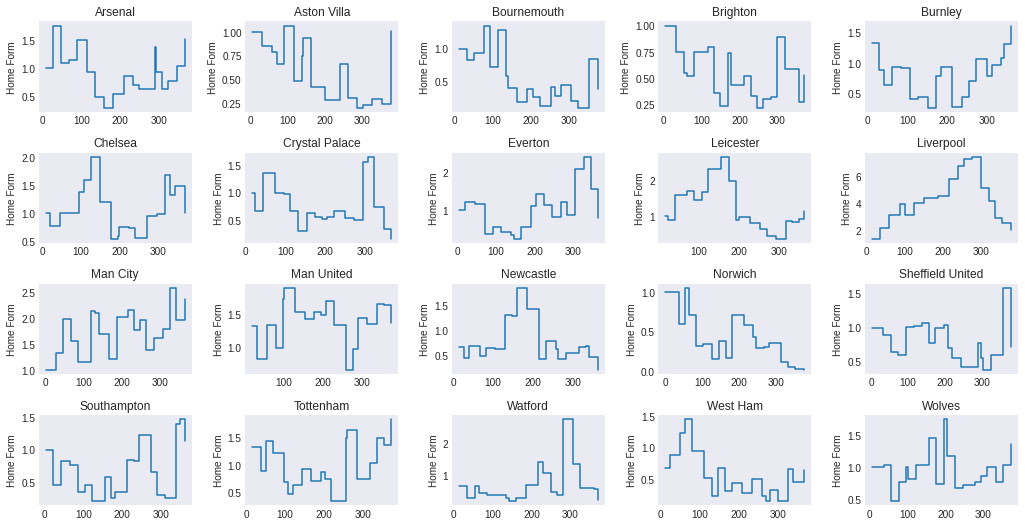

In [13]:
at = s2019_2020.groupby('AwayTeam')

fig, axes = plt.subplots(4, 5, figsize=(16, 8))

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.45, wspace=0.35)

clubs = list(at.groups.keys())
idx = 0
for i in range(4):
    for j in range(5):
        axes[i, j].plot(at.get_group(clubs[idx])['AF'], drawstyle='steps-post')
        axes[i, j].set_title(clubs[idx])
        axes[i, j].set_ylabel('Home Form')
        idx += 1
fig.savefig('plots/away_form.jpg', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

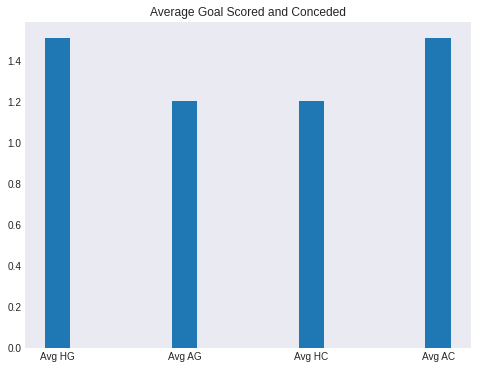

In [14]:
avg_home_scored = s2019_2020.FTHG.sum() * 1.0 / s2019_2020.shape[0]
avg_away_scored = s2019_2020.FTAG.sum() * 1.0 / s2019_2020.shape[0]
avg_home_conceded = avg_away_scored
avg_away_conceded = avg_home_scored

categories = ['Avg HG', 'Avg AG', 'Avg HC', 'Avg AC']
fig, ax = plt.subplots(figsize=(8, 6))
plt.bar(categories, [avg_home_scored, avg_away_scored, avg_home_conceded, avg_away_conceded], width=0.2)
plt.title('Average Goal Scored and Conceded')
fig.savefig('plots/goals_scored_and_conceded.jpg', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

In [15]:
ht = s2019_2020.groupby('HomeTeam')
at = s2019_2020.groupby('AwayTeam')

df = pd.DataFrame(columns=['Teams', 'HAS', 'AAS', 'HDS', 'ADS', 'Overall_Attack', 'Overall_Defence'])
df.Teams = ht.groups.keys()
HGS = ht.FTHG.sum().values
AGS = ht.FTAG.sum().values
HGC = at.FTAG.sum().values
AGC = at.FTHG.sum().values

num_matches = s2019_2020.shape[0] / 20 

HAS = HGS / num_matches / avg_home_scored
AAS = AGS / num_matches / avg_away_scored
HDS = HGC / num_matches / avg_home_conceded
ADS = AGC / num_matches / avg_away_conceded
df.HAS = HAS
df.AAS = AAS
df.HDS = HDS
df.ADS = ADS
df['Overall_Attack'] = (df.HAS + df.AAS) / 2
df['Overall_Defence'] = (df.HDS + df.ADS) / 2
df

,Teams,HAS,AAS,HDS,ADS,Overall_Attack,Overall_Defence
0,Arsenal,1.250000,1.048035,0.873362,0.833333,1.149017,0.853348
1,Aston Villa,0.763889,1.310044,0.829694,1.284722,1.036966,1.057208
2,Bournemouth,0.763889,1.310044,0.786026,1.215278,1.036966,1.000652
3,Brighton,0.694444,1.179039,0.829694,0.937500,0.936742,0.883597
4,Burnley,0.833333,1.004367,0.829694,0.937500,0.918850,0.883597
5,Chelsea,1.041667,0.698690,1.703057,1.319444,0.870178,1.511251
6,Crystal Palace,0.520833,0.873362,0.698690,1.041667,0.697098,0.870178
7,Everton,0.833333,0.917031,0.873362,1.215278,0.875182,1.044320
8,Leicester,1.215278,0.742358,1.397380,0.833333,0.978818,1.115357
9,Liverpool,1.805556,0.698690,1.441048,0.590278,1.252123,1.015663


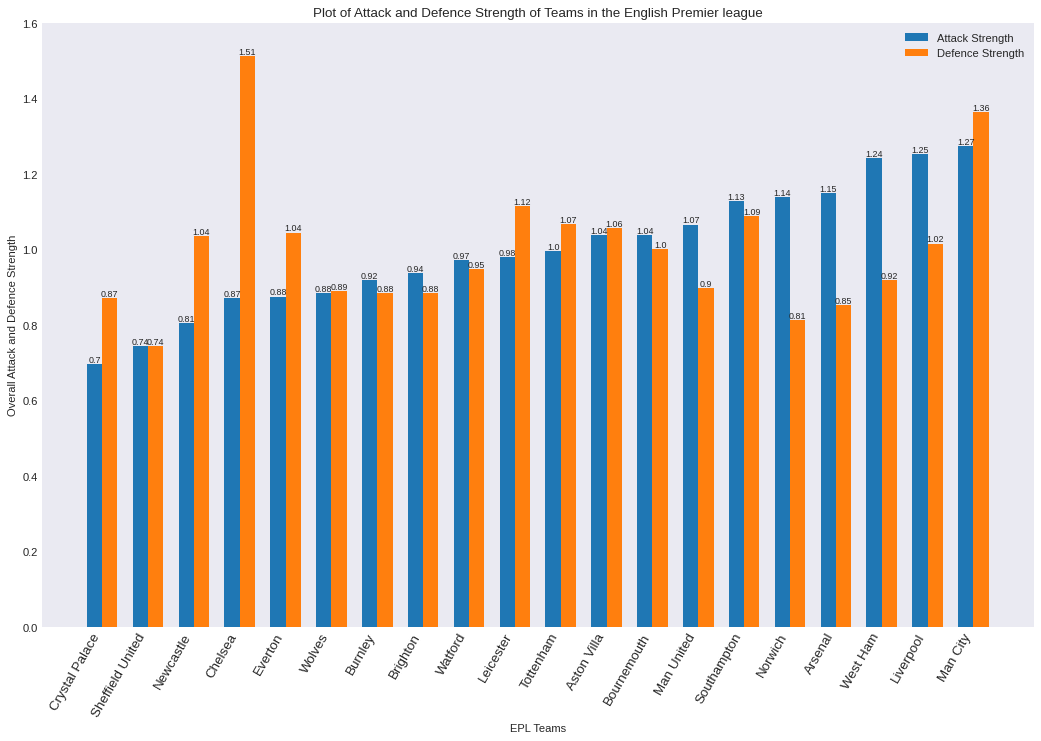

In [16]:
df1 = df.sort_values('Overall_Attack')
df1.reset_index(inplace=True)

indices = range(len(df1.Teams))
width = np.min(np.diff(indices))/3

fig, ax = plt.subplots(figsize=(16, 10), dpi=80)
ax.bar(indices-width/2, df1.Overall_Attack, width, label='Attack Strength')
ax.bar(indices+width/2, df1.Overall_Defence, width, label='Defence Strength')
ax.set_xticks(df1.index)
ax.set_xticklabels(df1.Teams, rotation=60, fontdict={'horizontalalignment': 'right', 'size': 12})
ax.set_ylabel('Overall Attack and Defence Strength')
ax.set_xlabel('EPL Teams')
ax.set_ylim(0, 1.6)

for row in df1.itertuples():
    ax.text(row.Index - width/2, row.Overall_Attack, s=round(row.Overall_Attack, 2), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
    ax.text(row.Index + width/2, row.Overall_Defence, s=round(row.Overall_Defence, 2), horizontalalignment='center', verticalalignment='bottom', fontsize=8)
plt.title('Plot of Attack and Defence Strength of Teams in the English Premier league')
plt.legend(loc='best')
fig.savefig('plots/team_strength.jpg', transparent=False, dpi=80, bbox_inches='tight')
plt.show()

In [17]:
from collections import namedtuple

Derby = namedtuple('Derby', 'ht at')

def is_derby(teams: list) -> bool:
    
    derbies = {
        'Lancashire': ['Bolton','Blackburn', 'Wigan'],
        'West Midlands': ['Wolves', 'West Brom', 'Aston Villa'],
        'West London': ['Chelsea', 'QPR', 'Fulham'],
        'Tyne-Wear': ['Sunderland', 'Newcastle'],
        'Merseyside': ['Everton', 'Liverpool'],
        'London': ['Arsenal', 'Chelsea'],
        'North West': ['Man United', 'Liverpool'],
        'North London': ['Arsenal', 'Tottenham'],
        'Manchester': ['Man United', 'Man City']
    }
    
    if teams in derbies.values() or list(reversed(teams)) in derbies.values():
        return 1
    else: 
        return 0

In [18]:
s2019_2020['DB'] = 0
s2019_2020.DB = s2019_2020.apply(lambda row: is_derby([row.HomeTeam, row.AwayTeam]), axis=1)

In [19]:
s2019_2020.loc[s2019_2020.DB == 1][['HomeTeam','AwayTeam','HF', 'AF', 'DB']]

,HomeTeam,AwayTeam,HF,AF,DB
39,Arsenal,Tottenham,1.185163,0.891100,1
88,Man United,Liverpool,0.659506,3.950186,1
147,Liverpool,Everton,4.294077,0.221484,1
154,Man City,Man United,1.823785,1.427385,1
196,Arsenal,Chelsea,0.458431,0.600532,1
228,Liverpool,Man United,5.960710,1.336934,1
234,Chelsea,Arsenal,0.491254,0.701086,1
286,Man United,Man City,0.921228,1.611599,1
298,Everton,Liverpool,0.582403,5.148403,1
347,Tottenham,Arsenal,1.020555,1.046290,1


In [20]:
 s2019_2020.groupby('DB').agg({
    'FTHG': "mean", 
    'FTAG': "mean",
    'HST': "mean",
    'AST': "mean",
    'FTR': "count",
})

,FTHG,FTAG,HST,AST,FTR
DB,,,,,
0,1.508108,1.205405,4.535135,3.986486,370
1,1.800000,1.200000,5.300000,4.300000,10


## Is there a statistical difference in home and away goals in derby and non derbies?

***null hypothesis:*** There is no difference between derbies and non derbies matches

***alternative hypothesis:*** There is difference between derbies and non derbies matches

In [21]:
test_pvalue = .05
derbies = s2019_2020[s2019_2020.DB == 1]
non_derbies = s2019_2020[s2019_2020.DB == 0]
print('Derbies Matches Full Time Home Goals mean: {:.3f}'.format(np.mean(derbies.FTHG)))
print('Non Derbies Matches Full Time Home Goals mean: {:.3f}'.format(np.mean(non_derbies.FTHG)))
t2, p2 = stats.ttest_ind(derbies.FTHG, non_derbies.FTHG)
print('T value: {:.3f}\nP value: {:.3f}'.format(t2, p2))

Derbies Matches Full Time Home Goals mean: 1.800
Non Derbies Matches Full Time Home Goals mean: 1.508
T value: 0.729
P value: 0.466


From the data, we do not reject the ***null hypothesis*** and conclude that there is no difference between derbies and non derbies matches

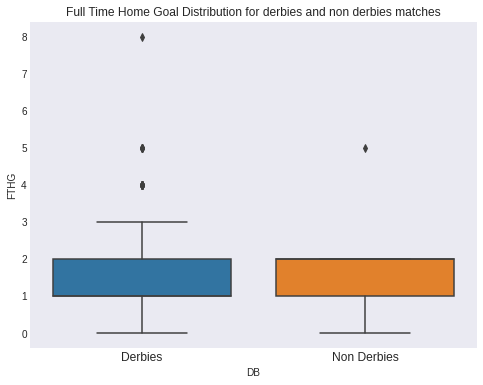

In [22]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.boxplot(x='DB', y='FTHG', data=s2019_2020)
ax.set_xticklabels(['Derbies', 'Non Derbies'], fontdict={'size': 12})
plt.title('Full Time Home Goal Distribution for derbies and non derbies matches')
fig.savefig('plots/derbies_and_non_derbies.jpg', dpi=80, bbox_inches='tight', transparent=False)
plt.show()

## What is the proportion of home wins, draws and away wins in derby and non derbies?

In [23]:
print('Derby matches: \n{}\n'.format(derbies.FTR.value_counts() / derbies.shape[0]))
print('Non Derby matches: \n{}\n'.format(non_derbies.FTR.value_counts()/ non_derbies.shape[0]))

Derby matches: 
H    0.4
D    0.4
A    0.2
Name: FTR, dtype: float64

Non Derby matches: 
H    0.454054
A    0.308108
D    0.237838
Name: FTR, dtype: float64



There are more occurence of ***draws*** in derby matches compared to non derby matches and the chances of the away team winning a derby match is more lower